In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Criando um dataframe a partir de uma lista de listas
df = pd.read_csv('../../source_data/perfil_clientes.csv', sep=';')
df.sample()

,idade,classe_trabalho,escolaridade,anos_estudo,estado_civil,raca,sexo,UF,região,qtde_filhos,salario
4466,53,Servidor Público,Mestrado,14,Casado,Branco,Masculino,PR,Sul,5.0,10076


#### pergunta 3
***
Crie um histograma das idades de todas as pessoas que residem no estado de São Paulo e trabalham no setor privado. Utilize 20 barras para representar graficamente os dados. Em seguida, selecione a opção que melhor se adapta à visualização.

In [5]:
df[(df['raca'] == 'Pardo') & (df['UF']=='MG')]


,idade,classe_trabalho,escolaridade,anos_estudo,estado_civil,raca,sexo,UF,região,qtde_filhos,salario
1601,50,Funcionário Setor Privado,Ensino Médio Completo,10,Divorciado,Pardo,Masculino,MG,Sudeste,1.0,2578
1709,41,Funcionário Setor Privado,Mestrado,14,Casado,Pardo,Masculino,MG,Sudeste,2.0,8556
2060,37,Funcionário Setor Privado,Ensino Médio Completo,13,Casado,Pardo,Feminino,MG,Sudeste,5.0,2765
3139,47,Funcionário Setor Privado,Ensino Médio Completo,10,Casado,Pardo,Masculino,MG,Sudeste,0.0,2148
3193,23,Funcionário Setor Privado,Ensino Médio Incompleto,9,Solteiro,Pardo,Masculino,MG,Sudeste,2.0,1100
3706,21,Funcionário Setor Privado,Ensino Médio Completo,10,Solteiro,Pardo,Masculino,MG,Sudeste,3.0,3204
4057,36,Autônomo,Ensino Médio Incompleto,9,Casado,Pardo,Feminino,MG,Sudeste,2.0,1100
4759,40,Funcionário Público,Mestrado,14,Casado,Pardo,Masculino,MG,Sudeste,5.0,9053
4894,54,Funcionário Setor Privado,Ensino Médio Incompleto,9,Casado,Pardo,Masculino,MG,Sudeste,3.0,1100
6622,57,Funcionário Setor Privado,Ensino Médio Completo,13,Casado,Pardo,Masculino,MG,Sudeste,5.0,3855


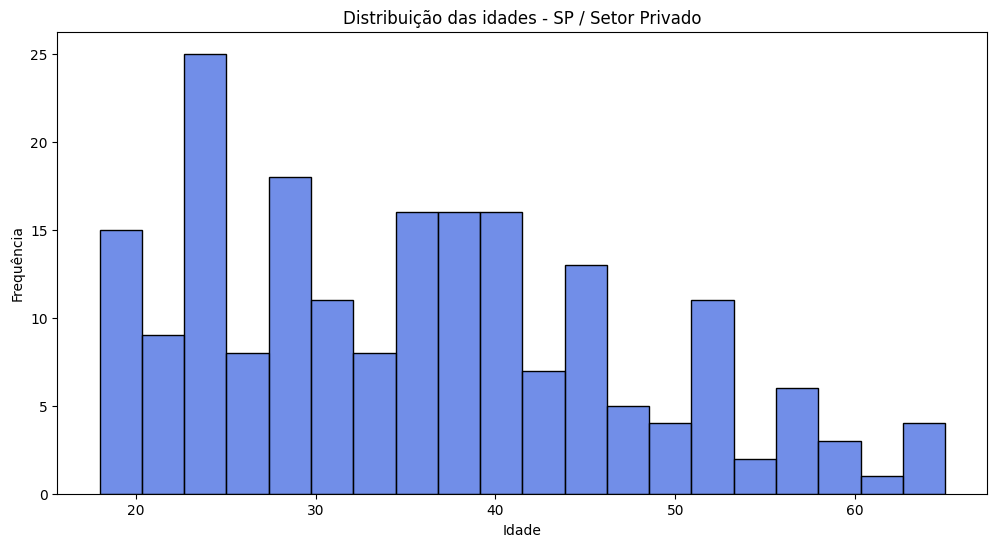

In [6]:
# Filtrar pessoas de SP e setor privado
df_sp_privado = df[(df['UF'] == 'SP') & (df['classe_trabalho'] == 'Funcionário Setor Privado')]
plt.figure(figsize=(12,6))
sns.histplot(df_sp_privado['idade'], bins=20, kde=False, color='royalblue')
plt.title('Distribuição das idades - SP / Setor Privado')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()


gabarito
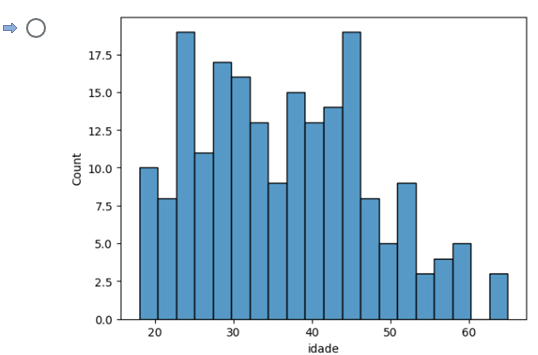

#### Questão
***
Crie um gráfico de barras que represente a média salarial de todas as pessoas, agrupadas por raça. Em seguida, selecione a melhor representação gráfica.

C:\Users\raulj\AppData\Local\Temp\ipykernel_37036\1068637466.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_salarial_raca.index, y=media_salarial_raca.values, palette='viridis')


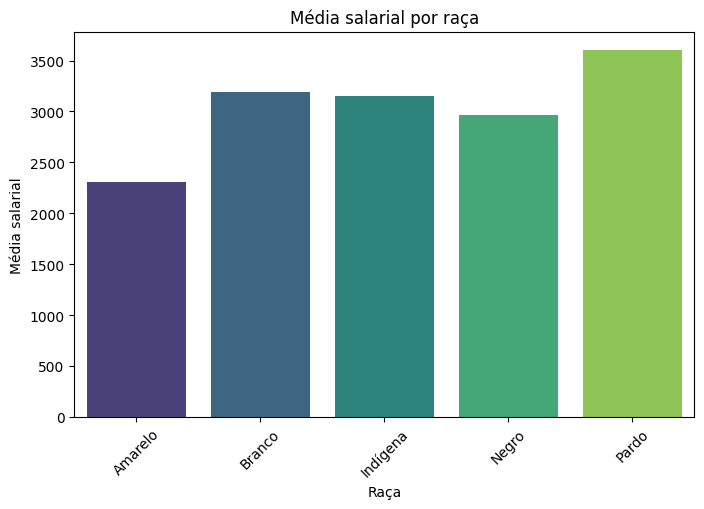

In [7]:
# Gráfico de barras: média salarial por raça
media_salarial_raca = df.groupby('raca')['salario'].mean()#.sort_values(ascending=True)
plt.figure(figsize=(8,5))
sns.barplot(x=media_salarial_raca.index, y=media_salarial_raca.values, palette='viridis')
plt.title('Média salarial por raça')
plt.xlabel('Raça')
plt.ylabel('Média salarial')
plt.xticks(rotation=45)
plt.show()

gab
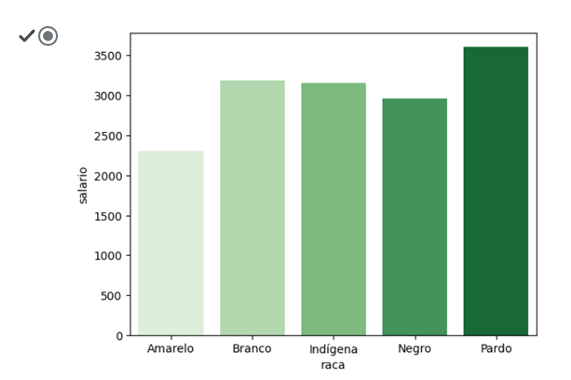

#### Questão
***
Crie um gráfico de barras para visualizar a distribuição do número de pessoas residentes em Minas Gerais, agrupadas por estado civil e raça. Em seguida, selecione a melhor representação gráfica

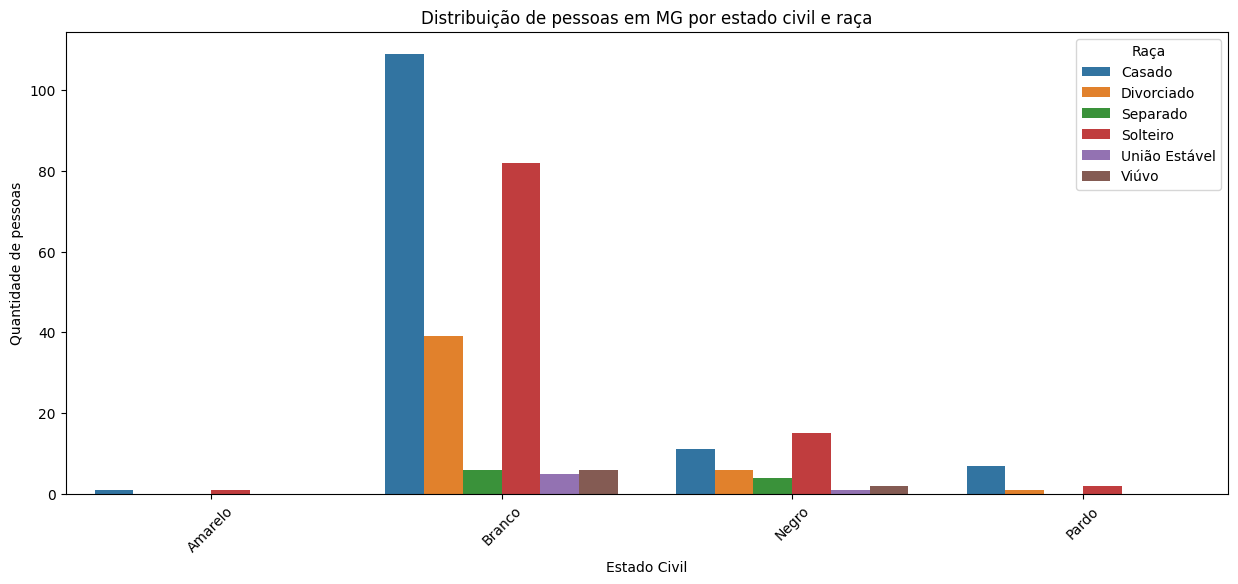

In [8]:
# Gráfico de barras: distribuição de pessoas em MG por estado civil e raça
df_mg = df[df['UF'] == 'MG']
distribuicao = df_mg.groupby(['estado_civil', 'raca']).size().reset_index(name='quantidade')
plt.figure(figsize=(15,6))
sns.barplot(data=distribuicao, x='raca', y='quantidade', hue='estado_civil')  #, palette='Set2')
plt.title('Distribuição de pessoas em MG por estado civil e raça')
plt.xlabel('Estado Civil')
plt.ylabel('Quantidade de pessoas')
plt.legend(title='Raça')
plt.xticks(rotation=45)
plt.show()

gab

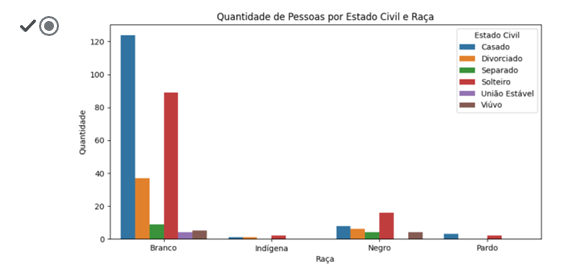

In [9]:
print(df_mg['raca'].value_counts())

raca
Branco     247
Negro       39
Pardo       10
Amarelo      2
Name: count, dtype: int64


In [10]:
df_clust = pd.read_csv('../../source_data/dados_clientes_clusterizado.csv', sep=';', encoding='latin1')
df_clust.head()

,sigla_estado,peso,colesterol,nome_cluster
0,RR,102.0,111,Risco Baixo
1,DF,115.0,135,Risco Baixo
2,AM,115.0,136,Risco Baixo
3,SE,130.0,158,Risco Moderado
4,ES,198.0,227,Risco Alto


#### Questão
***
Qual é a média e o desvio padrão do colesterol das pessoas que têm peso superior a 120 kg e residem na região Sul do Brasil?

In [11]:
df_br_sul = df_clust[(df_clust['sigla_estado'].isin(['PR', 'SC', 'RS']))]
df_br_sul.head()

,sigla_estado,peso,colesterol,nome_cluster
7,PR,191.0,223,Risco Alto
25,RS,108.0,123,Risco Baixo
59,PR,100.0,107,Risco Baixo
62,RS,150.0,185,Risco Moderado
64,RS,187.0,221,Risco Alto


In [12]:
# Média e desvio padrão do colesterol para pessoas com peso > 120kg na região Sul
df_peso_120 = df_br_sul[df_br_sul['peso'] > 120]
media_colesterol = df_peso_120['colesterol'].mean()
desvio_colesterol = df_peso_120['colesterol'].std()
print(f'Média do colesterol: {media_colesterol:.2f}')
print(f'Desvio padrão do colesterol: {desvio_colesterol:.2f}')

Média do colesterol: 196.97
Desvio padrão do colesterol: 24.33


gab
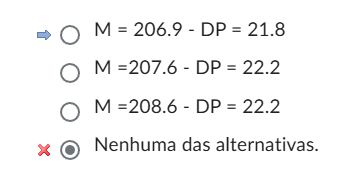

#### Question

***
Crie um gráfico de dispersão com as variáveis peso no eixo x e colesterol no eixo y para as pessoas na região Sudeste agrupados por gênero. Em seguida, escolha o gráfico que melhor representa essa ilustração.

In [13]:
df_sudeste = df_clust[df_clust['sigla_estado'].isin(['SP', 'RJ', 'MG', 'ES'])]
df_sudeste.head()

,sigla_estado,peso,colesterol,nome_cluster
4,ES,198.0,227,Risco Alto
6,SP,145.0,176,Risco Moderado
13,SP,125.0,152,Risco Moderado
28,MG,149.0,183,Risco Moderado
29,ES,169.0,204,Risco Alto


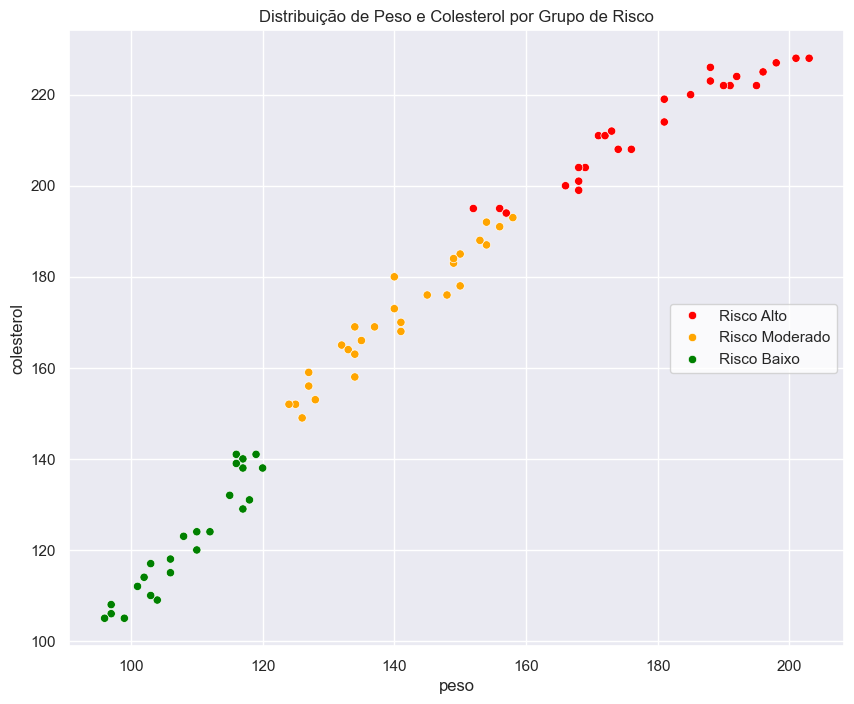

In [14]:
plt.figure(figsize=(10, 8))
sns.set(style='darkgrid')
scatter_plot = sns.scatterplot(data = df_sudeste,
                x = 'peso',
                y = 'colesterol',
                hue = 'nome_cluster',
                palette= {
                    'Risco Baixo': 'green',
                    'Risco Moderado': 'orange',    
                    'Risco Alto': 'red'}
                )

scatter_plot.legend(loc='center right', facecolor='white')
plt.title('Distribuição de Peso e Colesterol por Grupo de Risco')
plt.show()

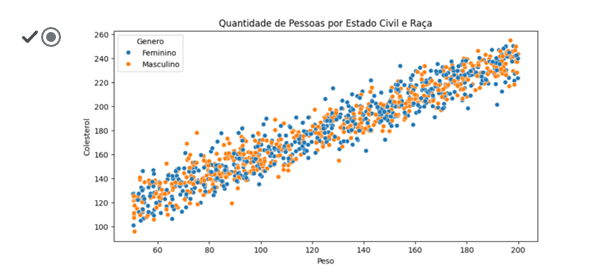

#### Question
***
Qual é a classe de trabalho com o maior número de pessoas e qual é o número correspondente na base de dados?

In [15]:
# Load the CSV file with the correct delimiter

# Count the values in the 'classe_trabalho' column
class_counts = df['classe_trabalho'].value_counts()

# Get the class with the highest count
most_common_class = class_counts.index[0]
count = class_counts.iloc[0]

print(f"A classe de trabalho com o maior número de pessoas é '{most_common_class}' com {count} pessoas.")

A classe de trabalho com o maior número de pessoas é 'Funcionário Setor Privado' com 5382 pessoas.



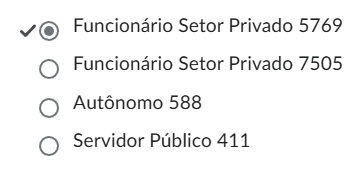

#### Question

***
Qual é a classe de trabalho que apresenta a maior média de salários e qual é o valor associado para as pessoas do estado de Pernambuco?

In [16]:
# Filtrar o DataFrame para incluir apenas pessoas de Pernambuco (UF == 'PE')
df_pe = df[df['UF'] == 'PE']

# Agrupar os dados pela coluna 'classe_trabalho' e calcular a média de 'salario' para cada grupo
media_salario_por_classe = df_pe.groupby('classe_trabalho')['salario'].mean()

# Encontrar a classe de trabalho com a maior média de salário usando idxmax()
classe_maior_media = media_salario_por_classe.idxmax()

# Encontrar o valor correspondente da maior média de salário usando max()
maior_media_salario = media_salario_por_classe.max()

# Exibir os resultados formatados
print(f"Para pessoas de Pernambuco (PE):")
print(f"A classe de trabalho com a maior média de salários é: '{classe_maior_media}'")
print(f"O valor da média salarial é: R$ {maior_media_salario:.2f}")

Para pessoas de Pernambuco (PE):
A classe de trabalho com a maior média de salários é: 'Empresário'
O valor da média salarial é: R$ 11290.47


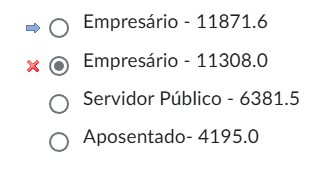

### Question
***
Crie um gráfico de boxplot para os salários agrupados por classe de trabalho. Em seguida, escolha a representação que melhor se adapta.

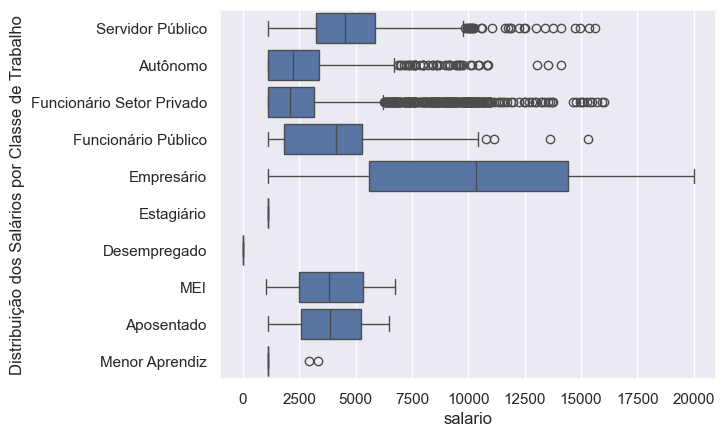

In [18]:

# idade;classe_trabalho;escolaridade;anos_estudo;
# estado_civil;raca;sexo;UF;região;qtde_filhos;salario

sns.boxplot(data=df,
             x='salario',
             y = 'classe_trabalho',
             orient= 'h'
             #hue = 'classe_trabalho'
                
                )
plt.ylabel('Distribuição dos Salários por Classe de Trabalho')
plt.show()

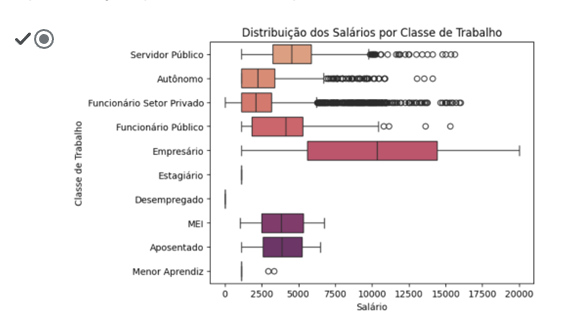

#### Question
***
Crie um gráfico de boxplot para as idades agrupados por raça para todas as pessoas que são da região sudeste. Em seguida, escolha a representação que melhor se adapta.

In [23]:
# idade;classe_trabalho;escolaridade;anos_estudo;
# estado_civil;raca;sexo;UF;região;qtde_filhos;salario

estados_sudeste = ['SP', 'RJ', 'MG' 'ES']

df_sudeste = df[df['UF'].isin(estados_sudeste)]
df_sudeste.head()



,idade,classe_trabalho,escolaridade,anos_estudo,estado_civil,raca,sexo,UF,região,qtde_filhos,salario
18,38,Funcionário Setor Privado,Ensino Médio Incompleto,7,Casado,Branco,Masculino,RJ,Sudeste,1.0,1100
19,43,Autônomo,Mestrado,14,Divorciado,Branco,Feminino,SP,Sudeste,1.0,6120
45,57,Funcionário Público,Superior Incompleto,13,Casado,Negro,Masculino,RJ,Sudeste,4.0,4789
46,53,Funcionário Setor Privado,Pós-Graduado,9,Casado,Branco,Masculino,SP,Sudeste,0.0,11972
72,29,Autônomo,Ensino Médio Completo,13,Casado,Branco,Masculino,RJ,Sudeste,4.0,2465


C:\Users\raulj\AppData\Local\Temp\ipykernel_37036\1419127019.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sudeste,


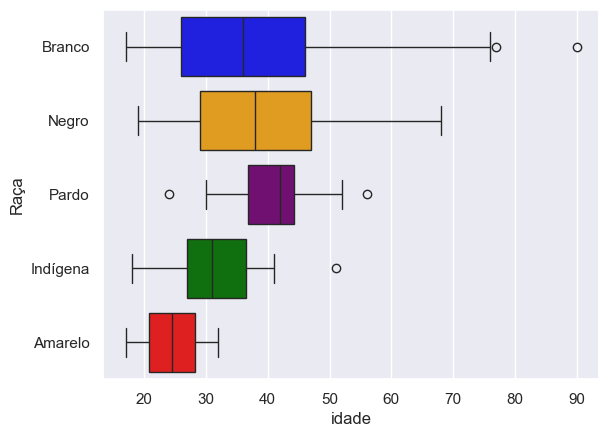

In [29]:
sns.boxplot(data=df_sudeste,
             x='idade',
             y = 'raca',
             orient= 'h',
             #hue = 'Distribuição das idades por raça',
             palette= {
                    'Branco': 'blue', 
                    'Negro': 'orange',    
                    'Indígena': 'green',
                    'Amarelo' : 'red',
                    'Pardo' : 'purple'
                    }  

                
                )
plt.ylabel('Raça')
plt.show()

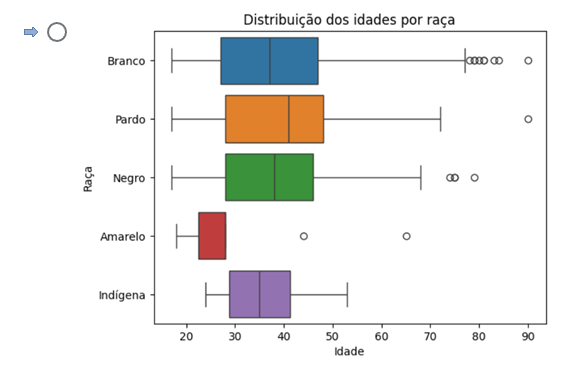

#### Question
*** 
Qual é a média salarial das pessoas casadas que possuem ensino superior completo e trabalham como Funcionário de Setor Privado?

In [47]:
df_married = df[df['estado_civil'].isin(['Casado']) & df['escolaridade'].isin(['Superior Completo'])
                & df['classe_trabalho'].isin(['Funcionário Setor Privado'])]
df_married['salario'].mean()

np.float64(11025.0)

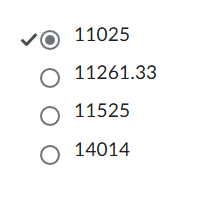

#### Question
***
Qual estado civil possui a menor quantidade filhos e qual é esse número? Some a quantidade de filhos

In [44]:
df_qtd_childs = df.groupby('estado_civil')['qtde_filhos'].sum().reset_index()

df_qtd_childs.head()

,estado_civil,qtde_filhos
0,Casado,9186.0
1,Divorciado,2800.0
2,Separado,669.0
3,Solteiro,5710.0
4,União Estável,284.0


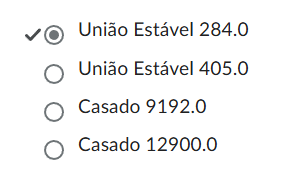